Zadane wartosci:
c = 300000000
aS = -0.7
aP = -0.9
aD1 = 1
aD2 = -0.9
aD3 = -0.44099999999999995
f = 3000000000

 ---------------------------------------------
Dystans pomiedzy terminalami:  3 m
Dlugosc kolejnych sciezek:
d1 = 3 m
d2 = 5.0 m
d3 = 36.124784 m
tau[i] = di / c:
t1 = 1e-08 s
t2 = 1.66666667e-08 s
t3 = 1.204159467e-07 s
~tau[i] = t[i] - tmax:
~t1 = 0.0 s
~t2 = 6.6666667e-09 s
~t3 = 1.104159467e-07 s
Moc P[i]:
P1 = P0 * 0.111111
P2 = P0 * 0.0324
P3 = P0 * 0.000149
Moc wzgledna ~P[i]:
~P1 = 0.0 dB
~P2 = -5.35212 dB
~P3 = -28.725708 dB
Complex Pr = P0 * (0.023311331401764737+0.0037393356857739523j)
Module Pr = P0 * 0.000557400803

 ---------------------------------------------
Dystans pomiedzy terminalami:  4 m
Dlugosc kolejnych sciezek:
d1 = 4 m
d2 = 5.656854 m
d3 = 36.221541 m
tau[i] = di / c:
t1 = 1.33333333e-08 s
t2 = 1.885618e-08 s
t3 = 1.2073847e-07 s
~tau[i] = t[i] - tmax:
~t1 = 0.0 s
~t2 = 5.5228467e-09 s
~t3 = 1.074051367e-07 s
Moc P[i]:
P1 = P0 * 0.0625
P2 = P0 * 0.0

Text(0.5, 1.0, 'spadek mocy jako funkcja odleglosci')

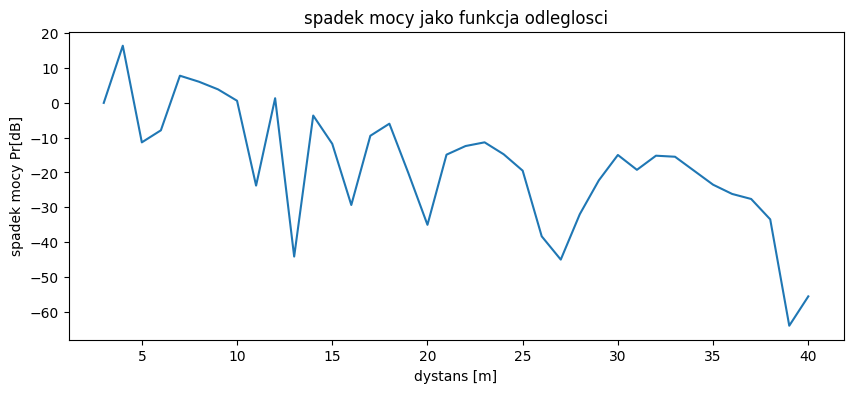

In [4]:
from cmath import exp
from math import sqrt
from math import log10
from math import pi
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


c = 3 * 10 ** 8 #predkosc swiatla
aS = -0.7 #wspolczynnik odbicia od sufitu
aP = -0.9 #wspolczynnik odbicia od podlogi
aD1 = 1 #wspolczynnik odbicia dla sciezki 1
aD2 = aP #wspolczynnik odbicia dla sciezki 2
aD3 = aS * aP * aS #wspolczynnik odbicia dla sciezki 3
f = 3 * 10 ** 9 #podana czestotliwosc komunikacji
distanceArray = [x + 1 for x in range(2, 40)] #tablica z odleglosciami terminali

PrArray = []

print("Zadane wartosci:")
print("c =", c)
print("aS =", aS)
print("aP =", aP)
print("aD1 =", aD1)
print("aD2 =", aD2)
print("aD3 =", aD3)
print("f =", f)


for distance in distanceArray:
    print("\n" , "---" * 15)
    print("Dystans pomiedzy terminalami: ", distance, "m")

    #dlugosc kolejnych sciezek
    print("Dlugosc kolejnych sciezek:")
    d1 = distance
    d2 = round(sqrt(4 ** 2 + distance ** 2), 6)
    d3 = round((sqrt((8+10+10+8) ** 2 + distance ** 2)), 6)
    print("d1 =", d1, "m")
    print("d2 =", d2, "m")
    print("d3 =", d3, "m")

    #tau[i] = di/c
    print("tau[i] = di / c:")
    t1 = round((d1 / c),16)
    t2 = round((d2 / c),16)
    t3 = round((d3 / c),16)
    print("t1 =", t1, "s")
    print("t2 =", t2, "s")
    print("t3 =", t3, "s")

    #tau wzgledne ~tau[i] = t[i] - tmax
    tmax = t1
    print("~tau[i] = t[i] - tmax:")
    tR1 = round(t1 - tmax, 16)
    tR2 = round(t2 - tmax, 16)
    tR3 = round(t3 - tmax, 16)
    print("~t1 =", tR1, "s")
    print("~t2 =", tR2, "s")
    print("~t3 =", tR3, "s")

    #moc P[i] = (aDi / di)^2
    print("Moc P[i]:")
    P1P0 = round(((aD1 / d1) ** 2), 6)
    P2P0 = round(((aD2 / d2) ** 2), 6)
    P3P0 = round(((aD3 / d3) ** 2), 6)
    print("P1 = P0 *", P1P0)
    print("P2 = P0 *", P2P0)
    print("P3 = P0 *", P3P0)

    #moc wzgledna ~P[i] = 10 * log10(P[i] / Pmax)
    Pmax = P1P0
    print("Moc wzgledna ~P[i]:")
    PR1 = round((10 * log10(P1P0 / Pmax)), 6)
    PR2 = round((10 * log10(P2P0 / Pmax)), 6)
    PR3 = round((10 * log10(P3P0 / Pmax)), 6)
    print("~P1 =", PR1, "dB")
    print("~P2 =", PR2, "dB")
    print("~P3 =", PR3, "dB")

    PrP0 = np.power((aD1 / d1) + (aD2 / d2) * exp(-1j * 2 * pi * tR2 * f) + (aD3 / d3) * exp(-1j * 2 * pi * tR3 * f), 2) 
    print("Complex Pr = P0 *", PrP0)

    PrP0module = round(np.power(PrP0.real, 2) + np.power(PrP0.imag, 2), 12)
    print("Module Pr = P0 *", PrP0module)

    PrArray.append(PrP0module)


#wyswietlanie mocy
print("\n")
Prmax = PrArray[0]
for i in range(len(PrArray)):
    PrArray[i] = 10 * log10(PrArray[i] / Prmax)
    print(PrArray[i]) 

#wykres
x = distanceArray
y = PrArray
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x, y)
plt.xlabel("dystans [m]")
plt.ylabel("spadek mocy Pr[dB]") # Pr[dB] = 10 * log10(Pr(dystans) / Pr_max)
plt.title("spadek mocy jako funkcja odleglosci")